##  Project_Parkinson's disease Analysis

In [1]:
### Importing all the essential Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, ttest_ind, f_oneway
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
#Reading the dataset

In [4]:
df = pd.read_csv("parkinsons_disease_data.csv")

In [5]:
#Reading the headers - first few rows of the dataset

In [6]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [43]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')

In [7]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 

In [8]:
# Checking all the columns

In [9]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')

In [10]:
#Shape of the dataset
df.shape

(2105, 35)

## Descriptive Statistics

In [11]:
# Statistical summary of the numerical features
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,6.996639,0.145843,0.106413,0.145843,0.148219,0.205226,0.048931,133.719715,90.249881,226.860840,126.147858,59.670352,222.940500,101.415318,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,1.753065,0.353033,0.308439,0.353033,0.355401,0.403962,0.215775,26.502355,17.061488,43.589406,43.407036,23.370920,101.895822,56.591448,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,4.000497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.062698,50.022828,20.027981,50.113604,0.028441,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,5.488864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,75.000000,189.385178,88.841960,39.538643,132.520174,53.048148,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,6.929819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.000000,91.000000,228.528256,126.884570,59.343357,222.802452,102.561023,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,8.558719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,264.608100,163.912782,79.366628,311.699109,149.831682,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,9.999821,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.963074,199.985981,99.982265,399.975022,198.953604,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

#### Checking Null Values

In [13]:
missing_data = pd.DataFrame(df.isnull().sum(), columns = ["Count"])
missing_data["Percentage"] = missing_data["Count"]/len(df) *100
missing_data

,Count,Percentage
PatientID,0,0.0
Age,0,0.0
Gender,0,0.0
Ethnicity,0,0.0
EducationLevel,0,0.0
BMI,0,0.0
Smoking,0,0.0
AlcoholConsumption,0,0.0
PhysicalActivity,0,0.0
DietQuality,0,0.0


### Check for duplicates

In [14]:
df.duplicated().sum()

0

## Five point summary 

### For Numerical Columns

In [15]:
numerical_description= df.describe(include=np.number)
numerical_description.iloc[:,0:10]

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864


In [16]:
numerical_description.iloc[:,10:20]

,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,6.996639,0.145843,0.106413,0.145843,0.148219,0.205226,0.048931,133.719715,90.249881,226.860840
std,1.753065,0.353033,0.308439,0.353033,0.355401,0.403962,0.215775,26.502355,17.061488,43.589406
min,4.000497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.062698
25%,5.488864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,75.000000,189.385178
50%,6.929819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.000000,91.000000,228.528256
75%,8.558719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,264.608100
max,9.999821,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.963074


In [17]:
numerical_description.iloc[:,20:30]

,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,126.147858,59.670352,222.940500,101.415318,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717
std,43.407036,23.370920,101.895822,56.591448,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733
min,50.022828,20.027981,50.113604,0.028441,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000
25%,88.841960,39.538643,132.520174,53.048148,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000
50%,126.884570,59.343357,222.802452,102.561023,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000
75%,163.912782,79.366628,311.699109,149.831682,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000
max,199.985981,99.982265,399.975022,198.953604,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000


In [18]:
numerical_description.iloc[:,30:]

,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000
mean,0.295012,0.245131,0.296912,0.619477
std,0.456156,0.430267,0.457006,0.485631
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


### For Categorical Columns

In [19]:
df.describe(include="object")

,DoctorInCharge
count,2105
unique,1
top,DrXXXConfid
freq,2105


## Exploratory Data Analysis

In [20]:
numerical_columns= df[["BMI","AlcoholConsumption","PhysicalActivity","DietQuality","SleepQuality","SystolicBP","DiastolicBP","CholesterolTotal","CholesterolLDL",
                     "CholesterolHDL","CholesterolTriglycerides","UPDRS","MoCA","FunctionalAssessment"]]
numerical_columns.head()

,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment
0,19.619878,5.108241,1.380660,3.893969,9.283194,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427
1,16.247339,6.027648,8.409804,8.513428,5.602470,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551
2,15.368239,2.242135,0.213275,6.498805,9.929824,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686
3,15.454557,5.997788,1.375045,6.715033,4.196189,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288
4,18.616042,9.775243,1.188607,4.657572,9.363925,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969


In [21]:
excluded = [col for col in df.columns if col not in numerical_columns]
excluded

['PatientID',
 'Age',
 'Gender',
 'Ethnicity',
 'EducationLevel',
 'Smoking',
 'FamilyHistoryParkinsons',
 'TraumaticBrainInjury',
 'Hypertension',
 'Diabetes',
 'Depression',
 'Stroke',
 'Tremor',
 'Rigidity',
 'Bradykinesia',
 'PosturalInstability',
 'SpeechProblems',
 'SleepDisorders',
 'Constipation',
 'Diagnosis',
 'DoctorInCharge']

In [22]:
categorcial_columns=df[['PatientID',
 'Age',
 'Gender',
 'Ethnicity',
 'EducationLevel',
 'Smoking',
 'FamilyHistoryParkinsons',
 'TraumaticBrainInjury',
 'Hypertension',
 'Diabetes',
 'Depression',
 'Stroke',
 'Tremor',
 'Rigidity',
 'Bradykinesia',
 'PosturalInstability',
 'SpeechProblems',
 'SleepDisorders',
 'Constipation',
 'Diagnosis',
 'DoctorInCharge']]

In [23]:
categorcial_columns.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,Smoking,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,DrXXXConfid


In [24]:
#droping the patientid and DoctorInCharge from the dataframe

In [25]:
import warnings
warnings.filterwarnings("ignore")


In [26]:
categorcial_columns.drop(["DoctorInCharge","PatientID"],axis=1,inplace=True)

In [27]:
categorcial_columns.drop(["Age"],axis=1,inplace=True)

In [28]:
categorcial_columns.head()

,Gender,Ethnicity,EducationLevel,Smoking,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,2,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1
3,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [29]:
num_col=numerical_columns.columns
num_col

Index(['BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS',
       'MoCA', 'FunctionalAssessment'],
      dtype='object')

### Detecting Outliers

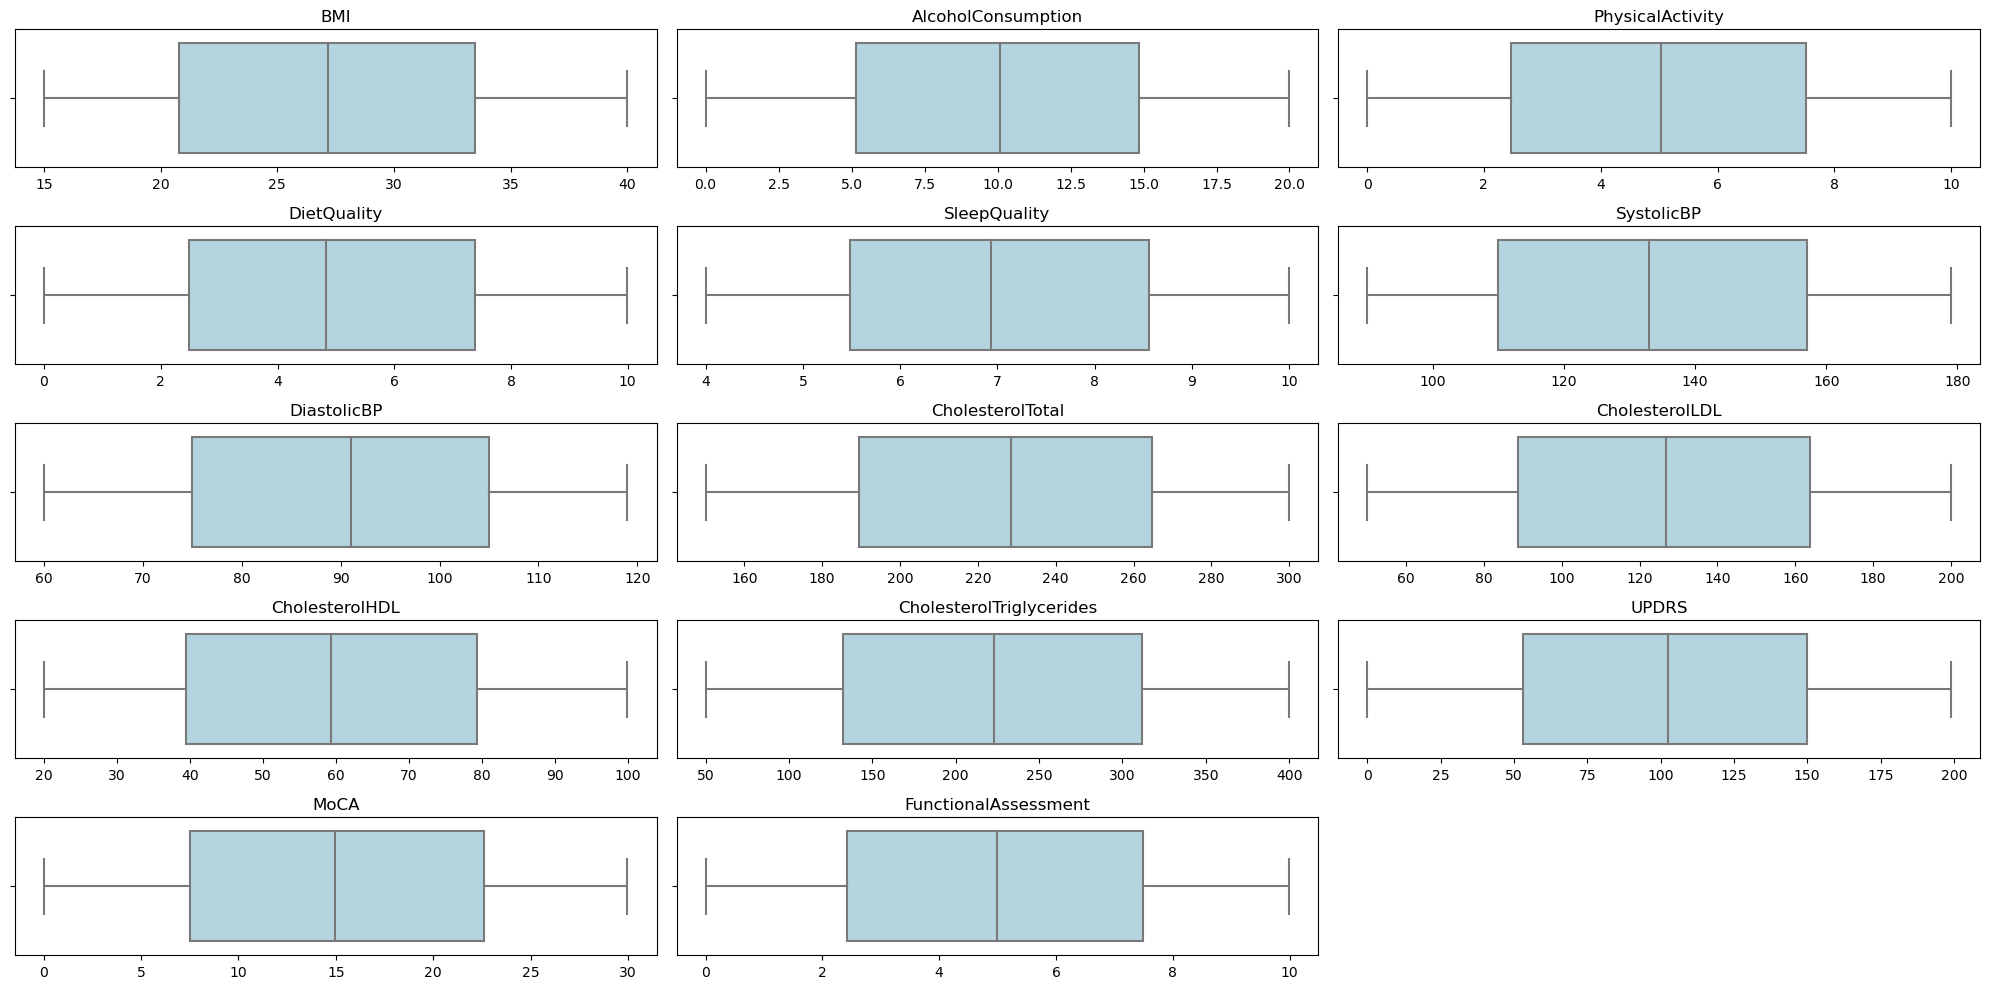

In [30]:
# Identify and eliminate outliers using the (IQR) method
plt.figure(figsize=(20, 10))
random=1
for  variable in (num_col):
    plt.subplot(5,3, random)
    sns.boxplot(x=df[variable],color="lightblue")
    plt.title(variable)
    random+=1
    plt.xlabel('')
plt.tight_layout()
plt.show()

### Histogram - Analysis of Distribution

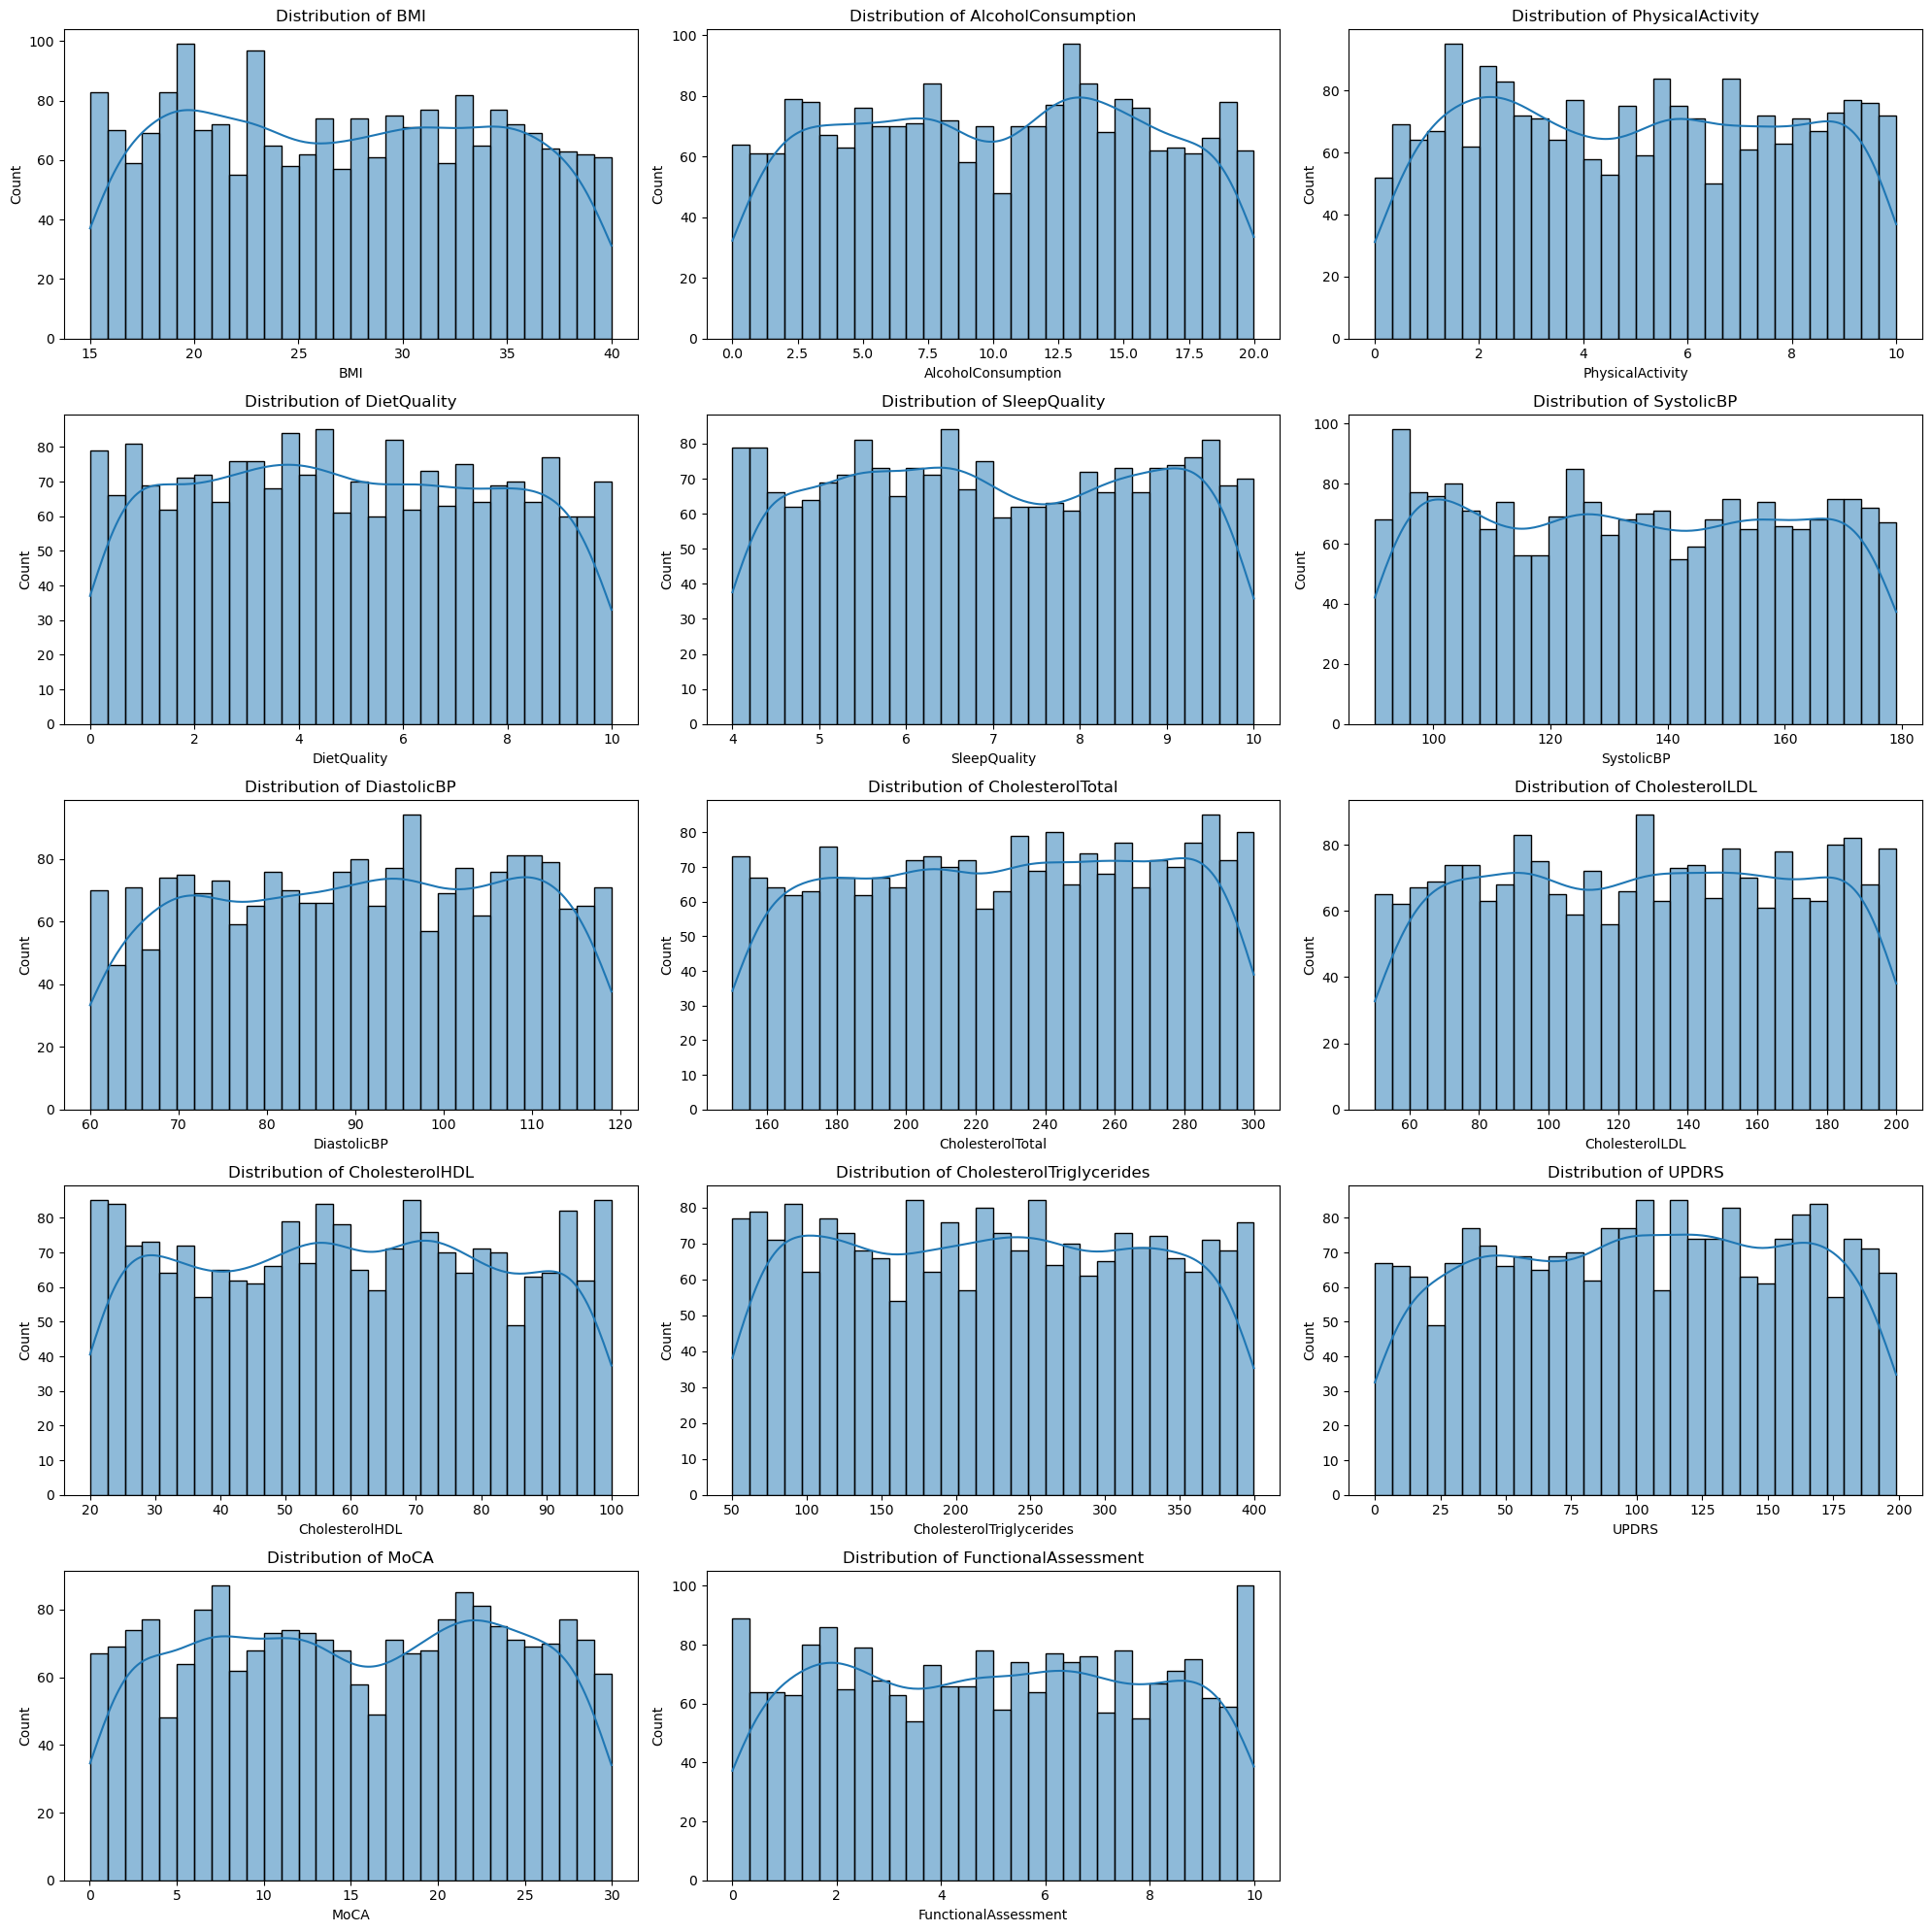

In [31]:
plt.figure(figsize=(20, 20))
for index, col in enumerate(num_col, start=1):
    plt.subplot(5, 3, index)  # Adjust the grid size based on the number of subplots
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Distribution of categorical columns

In [32]:
# Categorical columns

In [33]:
cat_col = categorcial_columns.columns
cat_col

Index(['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
       'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension',
       'Diabetes', 'Depression', 'Stroke', 'Tremor', 'Rigidity',
       'Bradykinesia', 'PosturalInstability', 'SpeechProblems',
       'SleepDisorders', 'Constipation', 'Diagnosis'],
      dtype='object')

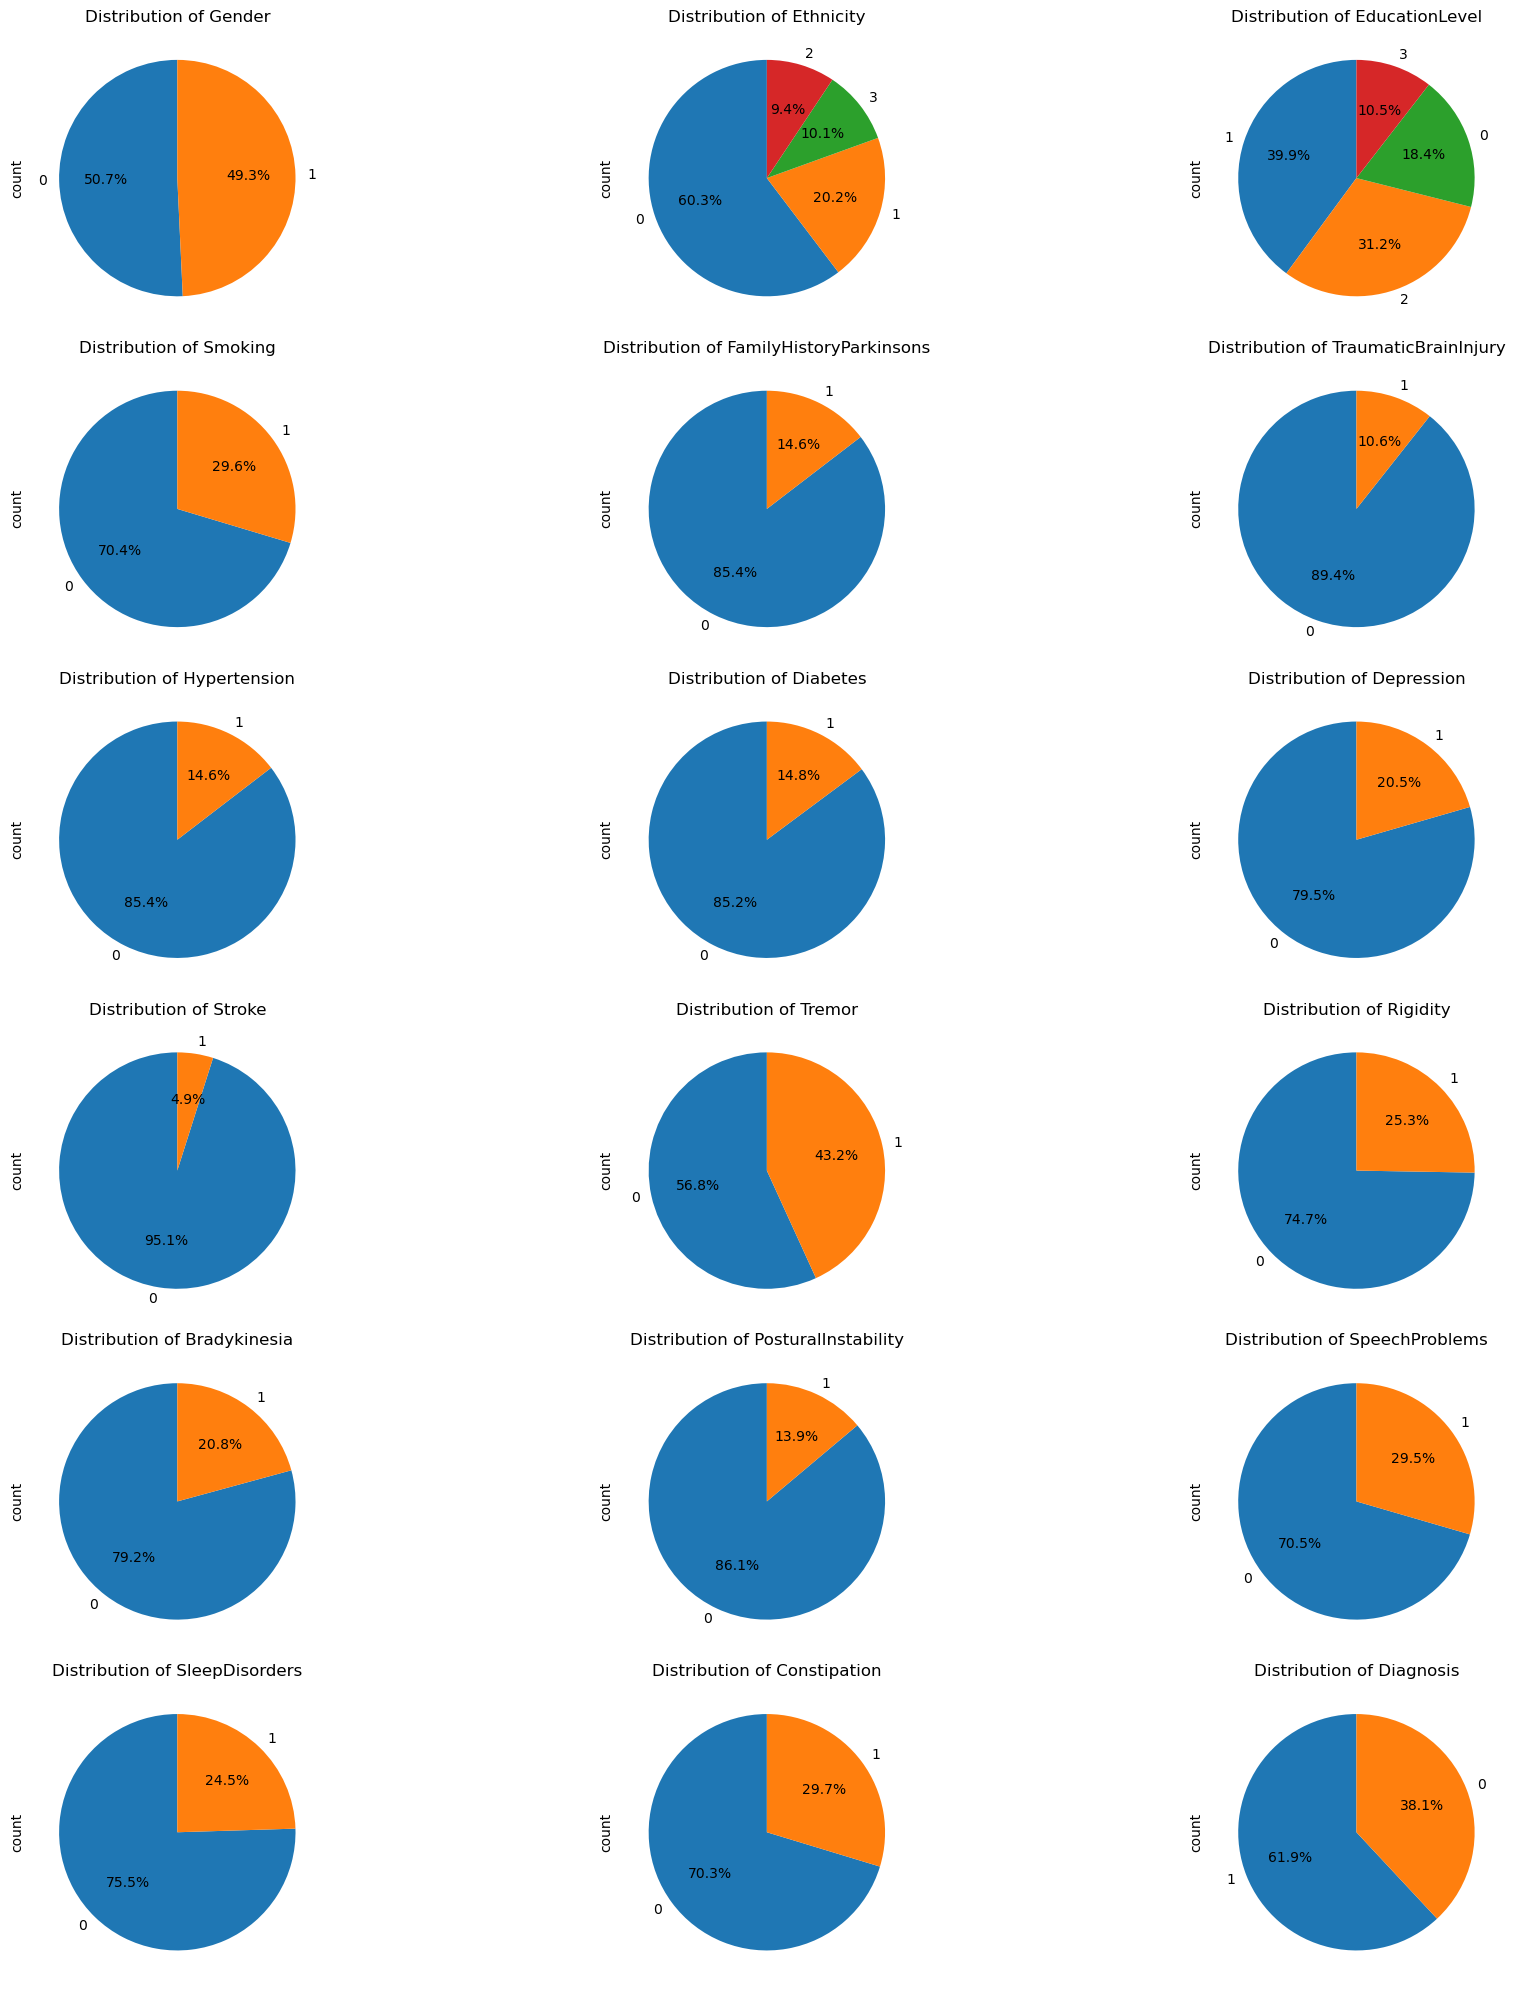

In [34]:
plt.figure(figsize=(20, 20))
for index, col in enumerate(cat_col, start=1):
    plt.subplot(6,3, index)  # Adjust the grid size based on the number of subplots
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=plt.gca(), legend=False)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Bi Variate Analysis

In [35]:
#Numerical vs Target

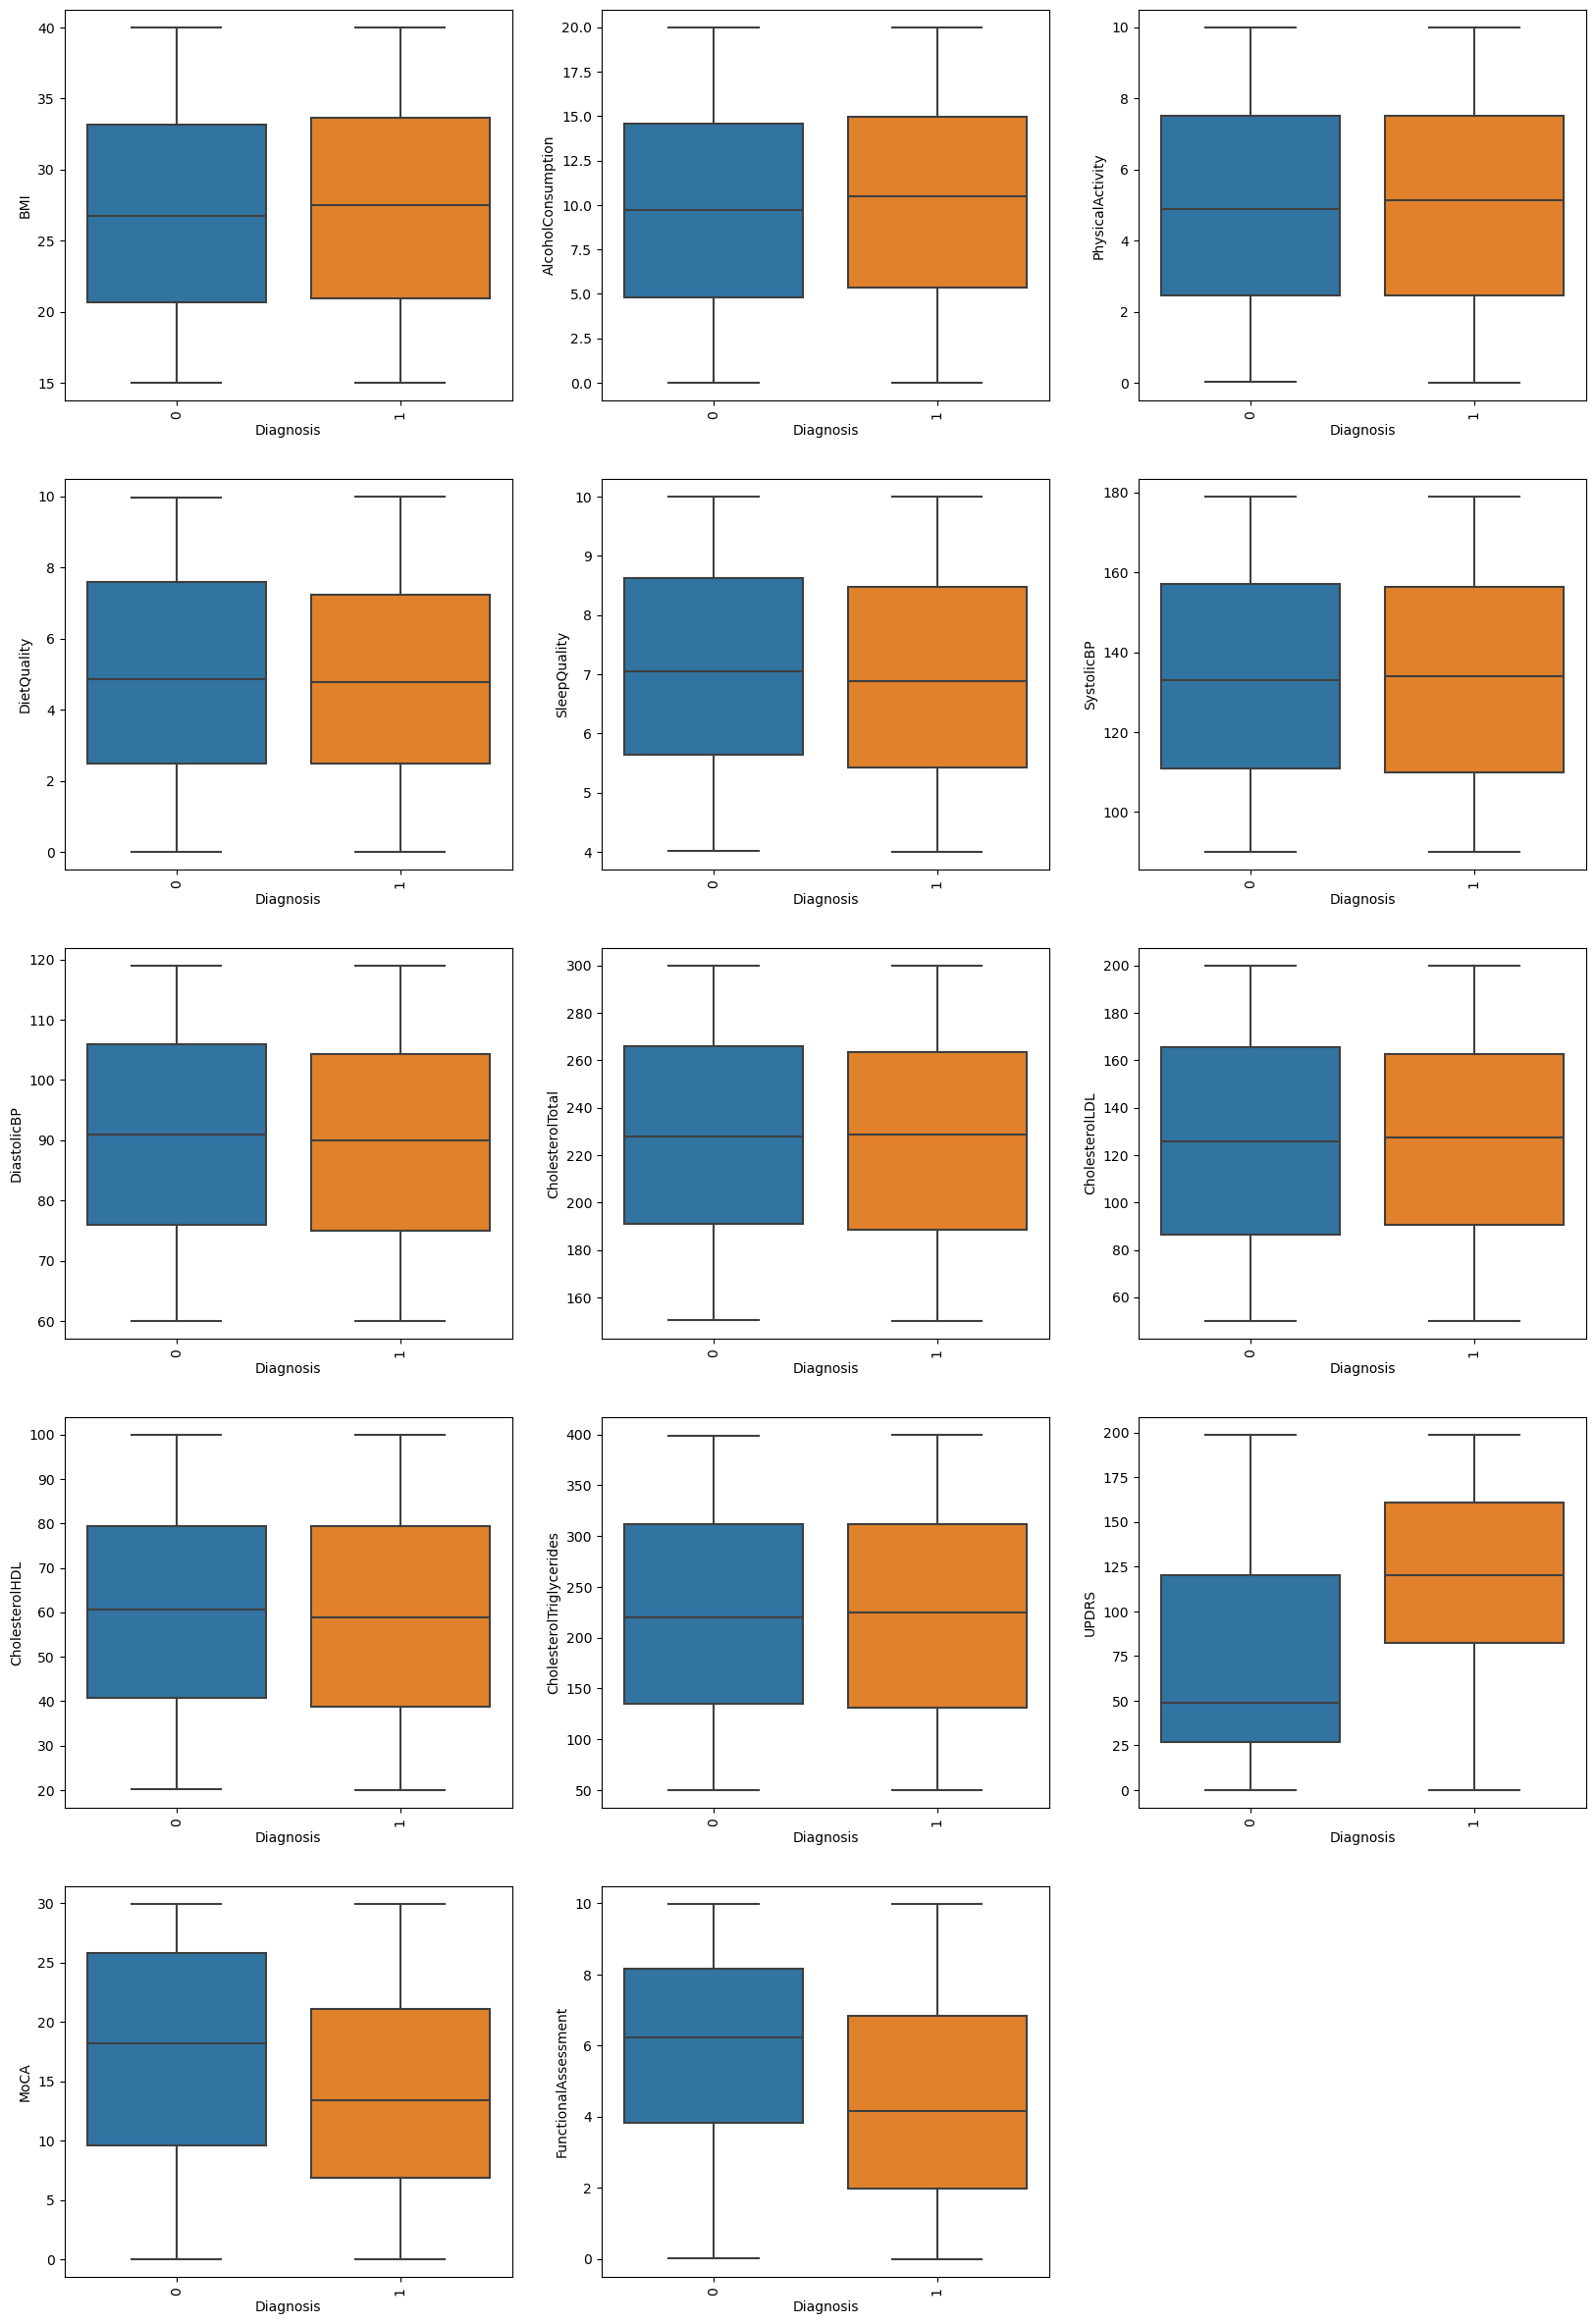

In [36]:
num_col 
plt.figure(figsize=[20,30])
for i in range(len(num_col)):
    plt.subplot(5,3, i+1)
    sns.boxplot(data=df, y=num_col[i], x='Diagnosis')
    plt.xticks(rotation=90)
plt.show()

## Dependent vs Categorical columns

In [37]:
new_cat=categorcial_columns.iloc[:,0:-1]
new=new_cat.columns

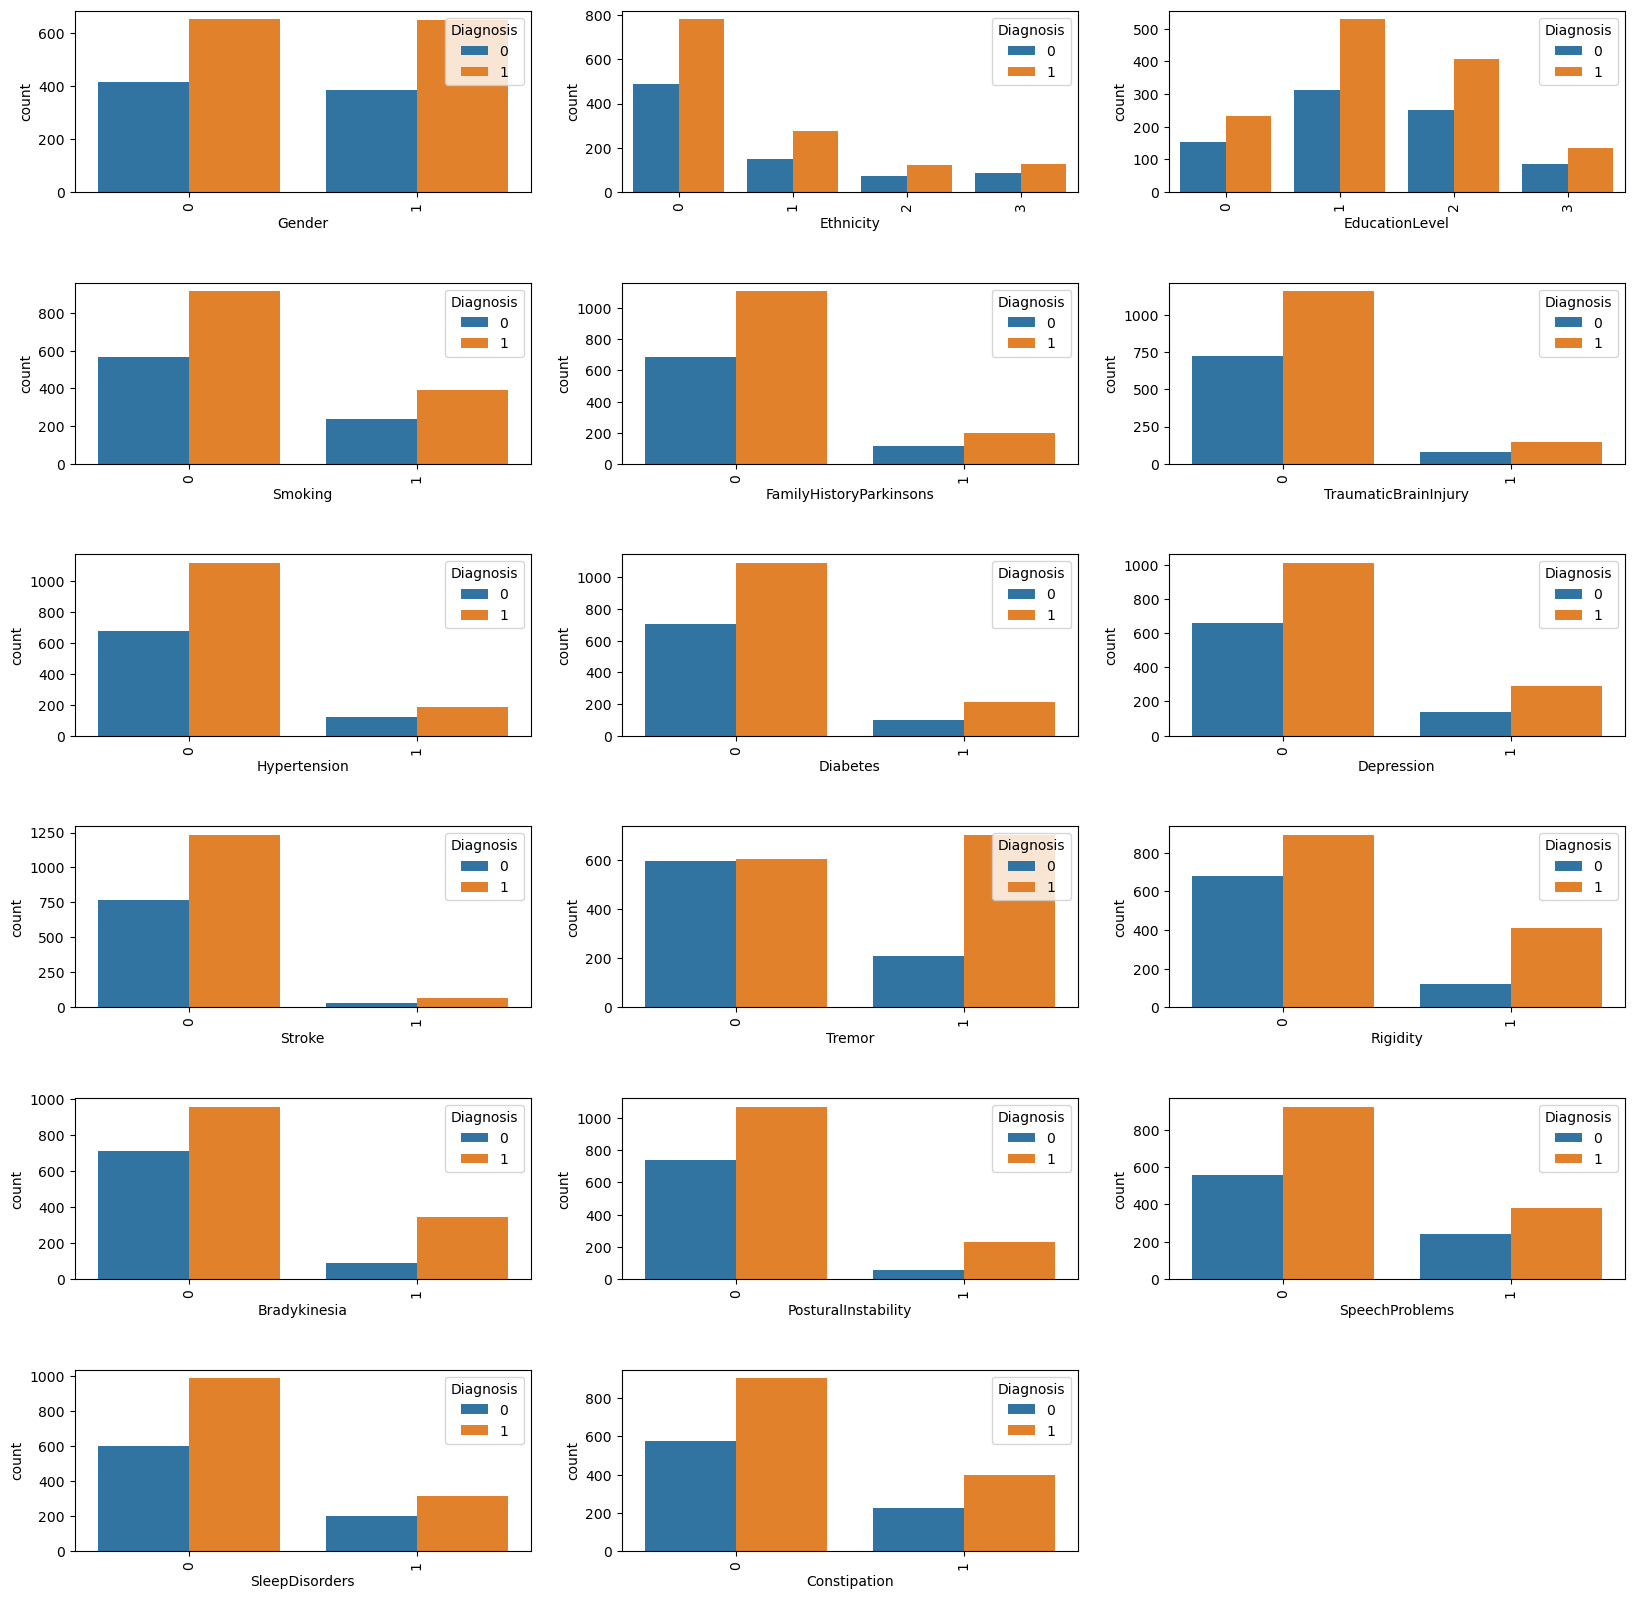

In [38]:
plt.figure(figsize=[20,20])
for i in range(len(new)):
    plt.subplot(6,3, i+1)
    sns.countplot(data=df, x=new[i], hue='Diagnosis')
    plt.subplots_adjust(hspace=0.5)
    plt.xticks(rotation=90)
plt.show()

### Multivariate analysis

In [39]:
correlation = df.iloc[:,1:-1].corr()
correlation

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
Age,1.000000,0.008675,0.020966,0.015130,0.035622,-0.007591,-0.009016,0.028100,0.012580,0.020866,0.008502,-0.005293,0.005018,-0.001591,-0.020399,-0.029636,-0.017648,0.003578,0.020570,0.039681,-0.014015,0.014923,0.007823,-0.040081,0.039672,0.031264,-0.013883,-0.006975,-0.019534,-0.003485,0.019952,-0.028810,0.065344
Gender,0.008675,1.000000,-0.021080,-0.011429,0.072500,-0.038296,-0.020645,-0.002626,-0.005765,-0.014885,-0.027567,-0.016488,0.034354,-0.028622,-0.020749,-0.007671,-0.035768,-0.009254,0.001787,0.032514,0.008505,0.036962,0.025916,0.039508,0.032247,0.019554,0.028244,-0.021746,-0.021580,0.002235,-0.022533,-0.043462,0.016835
Ethnicity,0.020966,-0.021080,1.000000,0.029189,-0.003830,0.052649,0.021406,0.011913,-0.027598,-0.011927,0.005848,0.002839,0.020601,0.075800,0.005604,-0.024887,-0.039399,-0.014662,0.010951,0.010817,-0.028280,-0.020258,-0.003757,0.007343,-0.017035,-0.010136,-0.032114,0.028381,0.032525,-0.018815,-0.002642,-0.013363,-0.005068
EducationLevel,0.015130,-0.011429,0.029189,1.000000,0.008032,-0.005192,-0.000339,-0.011574,0.026629,0.023454,0.021718,0.060972,0.002181,0.044433,0.010887,0.015389,0.000581,-0.023242,-0.017750,0.000241,0.019588,-0.010117,-0.001505,-0.027360,-0.020562,-0.004924,0.012890,0.006020,-0.009958,0.020402,-0.012383,0.006028,0.004557
BMI,0.035622,0.072500,-0.003830,0.008032,1.000000,-0.008026,0.015542,-0.003622,0.008020,0.017669,0.034808,-0.033708,0.005159,-0.016036,-0.038414,-0.020902,-0.022107,0.006896,0.010158,-0.019995,-0.025793,0.026938,0.042895,-0.017810,-0.004586,0.003343,-0.042454,-0.010259,0.008835,-0.011635,0.047169,-0.020104,0.030114
Smoking,-0.007591,-0.038296,0.052649,-0.005192,-0.008026,1.000000,-0.032095,-0.031046,0.034870,0.009966,0.026507,-0.024969,0.002929,0.030774,0.020449,0.026362,0.030619,0.016226,0.007272,-0.029628,0.017399,-0.001722,0.012209,-0.021843,-0.004500,0.034733,0.003101,-0.024475,0.022392,0.015767,0.029112,0.008485,0.005241
AlcoholConsumption,-0.009016,-0.020645,0.021406,-0.000339,0.015542,-0.032095,1.000000,0.004530,0.007507,0.005871,-0.025787,0.008327,-0.007529,-0.019627,-0.001067,-0.018941,0.002195,-0.040023,-0.021387,-0.002003,-0.001786,-0.042412,0.025838,-0.009050,0.002637,0.013162,-0.014867,0.062642,0.007900,0.001887,-0.013234,-0.001646,0.036699
PhysicalActivity,0.028100,-0.002626,0.011913,-0.011574,-0.003622,-0.031046,0.004530,1.000000,-0.017340,-0.007859,-0.019977,-0.043671,-0.007104,-0.008010,0.023566,-0.031570,0.009284,-0.006053,0.017807,-0.009559,0.017164,0.033488,0.012745,-0.029015,0.010416,-0.030366,0.014713,0.017127,0.030633,-0.050550,-0.006789,-0.017576,0.012940
DietQuality,0.012580,-0.005765,-0.027598,0.026629,0.008020,0.034870,0.007507,-0.017340,1.000000,0.041904,-0.011851,-0.004348,-0.045676,-0.009086,0.000273,0.017642,0.010411,0.001719,0.008308,-0.004827,0.027148,-0.017069,0.019461,-0.008086,0.032041,-0.008994,-0.003330,-0.010982,-0.014747,-0.007910,0.015327,-0.007378,-0.022992
SleepQuality,0.020866,-0.014885,-0.011927,0.023454,0.017669,0.009966,0.005871,-0.007859,0.041904,1.000000,0.019037,-0.004382,-0.002244,0.004174,0.012125,0.023267,-0.023922,-0.045117,0.053631,-0.024488,0.018683,0.010580,-0.035224,-0.011037,0.031218,0.002998,0.027758,-0.004400,-0.023170,-0.005128,0.013095,-0.001223,-0.043295


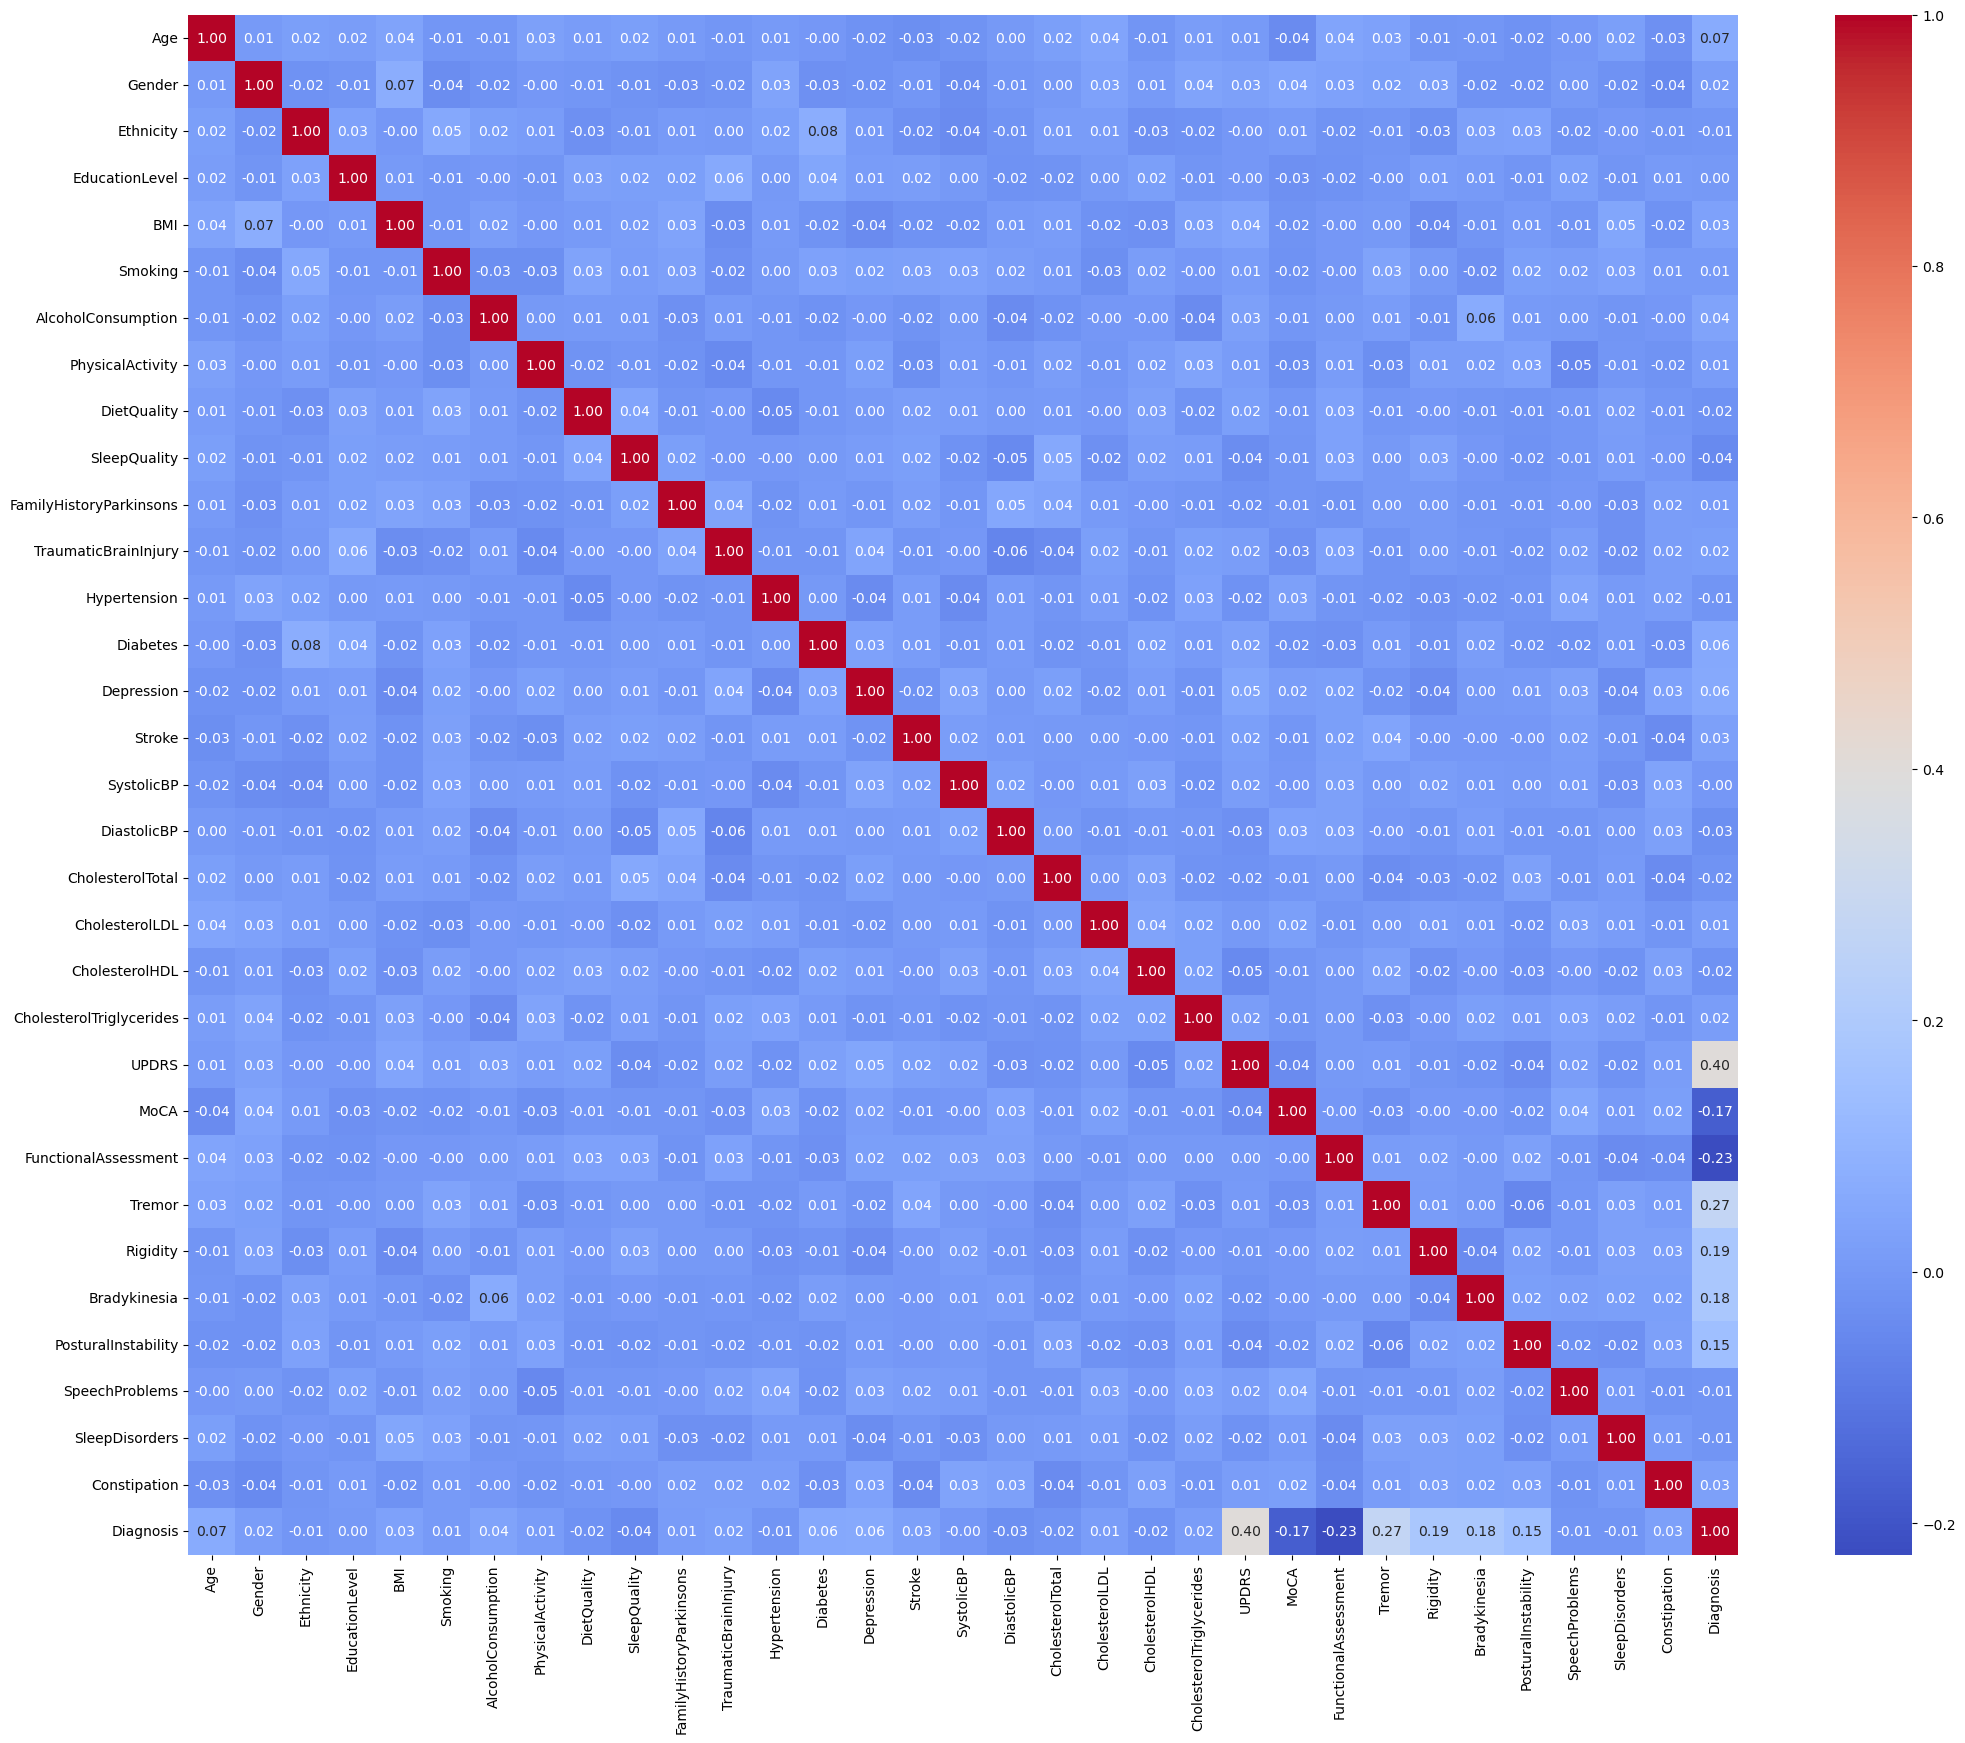

In [40]:
plt.figure(figsize=(25,20))
sns.heatmap(correlation, 
            annot=True,  # Display correlation values within cells
            fmt=".2f",    # Format values to two decimal places
            cmap='coolwarm')  # Use a color palette
plt.show()

### Train-Test split method 

In [63]:
from sklearn.model_selection import train_test_split

In [71]:
new_df=pd.concat([numerical_columns,categorcial_columns],axis=1)

In [72]:
new_df.head()

,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Gender,Ethnicity,EducationLevel,Smoking,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,19.619878,5.108241,1.380660,3.893969,9.283194,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,16.247339,6.027648,8.409804,8.513428,5.602470,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,0,2,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1
2,15.368239,2.242135,0.213275,6.498805,9.929824,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1
3,15.454557,5.997788,1.375045,6.715033,4.196189,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1
4,18.616042,9.775243,1.188607,4.657572,9.363925,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [73]:
x = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

In [75]:
x.shape

(2105, 31)

In [76]:
y.shape

(2105,)

In [77]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=10)

In [79]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1473, 31)
(1473,)
(632, 31)
(632,)


### Building the models 

In [80]:
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [81]:
x = sm.add_constant(x)

In [82]:
logreg = sm.Logit(ytrain, xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.382458
         Iterations 7


In [83]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 1473
Model:                          Logit   Df Residuals:                     1442
Method:                           MLE   Df Model:                           30
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                  0.4215
Time:                        11:16:06   Log-Likelihood:                -563.36
converged:                       True   LL-Null:                       -973.78
Covariance Type:            nonrobust   LLR p-value:                2.617e-153
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
BMI                          0.0123      0.010      1.229      0.219      -0.007       0.032
AlcoholConsumption          -0.0055      0.013     -0.419      0.675      -0.031       0.

In [ ]:
#if p_value is greater then 0.05 then the variable is not siginificant

### Interpret the odds for each variable

In [84]:
df_odds=pd.DataFrame(np.exp(logreg.params),columns=['odds'])
df_odds

,odds
BMI,1.012423
AlcoholConsumption,0.994471
PhysicalActivity,1.019171
DietQuality,0.989829
SleepQuality,0.948859
SystolicBP,0.997376
DiastolicBP,0.993373
CholesterolTotal,0.998935
CholesterolLDL,0.999757
CholesterolHDL,0.998214


### Logistics regression 

In [85]:
# with sklearn

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
ypred_lr = model.predict(xtest)

In [86]:
print('Train Accuracy :',  accuracy_score(ytrain, model.predict(xtrain)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest, ypred_lr))

Train Accuracy : 0.7881873727087576
-- --- --- --- ---
Test Accuracy : 0.7800632911392406


In [87]:
print('Training set score: {:.4f}'.format(model.score(xtrain, ytrain)))

print('Test set score: {:.4f}'.format(model.score(xtest, ytest)))

Training set score: 0.7882
Test set score: 0.7801


* Accuracy: The amount of correct classifications / the total amount of classifications.
* The train accuracy: The accuracy of a model on examples it was constructed on.
* The test accuracy is the accuracy of a model on examples it hasn't seen.
* here accuracy of both are almost similar which is good sign.

In [ ]:
### classification report

In [88]:
print("Accuracy : ", accuracy_score(ytest,ypred_lr))
print('Classification Report : \n', classification_report(ytest,ypred_lr))

Accuracy :  0.7800632911392406
Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.67      0.71       250
           1       0.80      0.85      0.82       382

    accuracy                           0.78       632
   macro avg       0.77      0.76      0.77       632
weighted avg       0.78      0.78      0.78       632



In [ ]:
### roc curve

In [89]:
ypred_lr_prob = model.predict_proba(xtest)[:,1]

0.8623979057591623


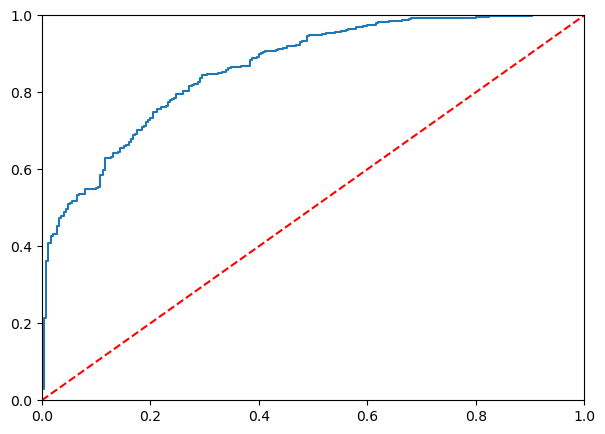

In [90]:
fpr, tpr, threshold = roc_curve(ytest,ypred_lr_prob)
plt.figure(figsize=(7,5))
# plot the ROC curve

plt.plot(fpr, tpr)


# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

print(roc_auc_score(ytest,ypred_lr_prob))
plt.show()

In [91]:
print('Accuracy : ', accuracy_score(ytest,ypred_lr))

Accuracy :  0.7800632911392406


In [ ]:
#confusion matrix


In [92]:
cm = confusion_matrix(ytest,ypred_lr)
cm

array([[168,  82],
       [ 57, 325]])

In [93]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [94]:
# RECALL for '0' class 'TNR'
specificity = TN/(TN+FP)
specificity

0.672

In [95]:
# RECALL for '1' class 'TPR'
sensitivity = TP/(FN+TP)
sensitivity

0.8507853403141361

From Classification Report we get f1-score
* for 0 class = 0.672
* for 1 class = 0.8507

In [ ]:
# cross validation

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
scores = cross_val_score(estimator = LogisticRegression(), 
                         X = xtrain, 
                         y = ytrain, 
                         cv = 5, 
                         scoring = 'f1')

In [99]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.83123426 0.83646113 0.85138539 0.83870968 0.77628032]

Minimum score obtained:  0.7763
Maximum score obtained:  0.8514
Average score obtained:  0.8268


### Yuden'Index on Logistic Regression base model


Youden's Index is the classification cut-off probability for which the (Sensitivity + Specificity - 1) is maximized.<br>
​
<p style='text-indent:12em'> <strong>Youden's Index = max(Sensitivity + Specificity - 1) = max(TPR + TNR - 1) = max(TPR - FPR) </strong> </p>
​
i.e. select the cut-off probability for which the (TPR - FPR) is maximum.


In [100]:
# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': threshold})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.845550,0.296,0.521633,0.549550
1,0.795812,0.248,0.586602,0.547812
2,0.837696,0.292,0.536511,0.545696
3,0.816754,0.272,0.562509,0.544754
4,0.748691,0.204,0.631134,0.544691


In [101]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_youden = [ 0 if x < 0.1 else 1 for x in ypred_lr_prob]

In [102]:
cm_yd = confusion_matrix(ytest,y_pred_youden)
cm_yd

array([[ 47, 203],
       [  2, 380]])

In [103]:
print("Accuracy : ", accuracy_score(ytest,y_pred_youden))
print('Classification Report : \n', classification_report(ytest,y_pred_youden))

Accuracy :  0.6756329113924051
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.19      0.31       250
           1       0.65      0.99      0.79       382

    accuracy                           0.68       632
   macro avg       0.81      0.59      0.55       632
weighted avg       0.77      0.68      0.60       632



In [107]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [108]:
print('Training set score: {:.4f}'.format(model.score(xtrain, ytrain)))

print('Test set score: {:.4f}'.format(model.score(xtest, ytest)))

Training set score: 0.7882
Test set score: 0.7801


In [109]:
# Evaluate Model

lr_eval = evaluate_model(lr, xtest, ytest)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

Accuracy: 0.7800632911392406
Precision: 0.7985257985257985
Recall: 0.8507853403141361
F1 Score: 0.8238276299112801
Cohens Kappa Score: 0.5319765583377731
Area Under Curve: 0.8623979057591623
Confusion Matrix:
 [[168  82]
 [ 57 325]]


In [110]:
scores = cross_val_score(estimator = LogisticRegression(), 
                         X = xtrain, 
                         y = ytrain, 
                         cv = 5, 
                         scoring = 'f1')

In [111]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.83123426 0.83646113 0.85138539 0.83870968 0.77628032]

Minimum score obtained:  0.7763
Maximum score obtained:  0.8514
Average score obtained:  0.8268


### Decision Tree

In [104]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(xtrain, ytrain)
ypred_dt = dtc.predict(xtest)

In [105]:
print('Train Accuracy :',  accuracy_score(ytrain, dtc.predict(xtrain)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest, ypred_dt))

Train Accuracy : 1.0
-- --- --- --- ---
Test Accuracy : 0.8639240506329114


In [112]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, xtest, ytest)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.8639240506329114
Precision: 0.887434554973822
Recall: 0.887434554973822
F1 Score: 0.887434554973822
Cohens Kappa Score: 0.715434554973822
Area Under Curve: 0.8577172774869111
Confusion Matrix:
 [[207  43]
 [ 43 339]]


In [113]:
scores_dt = cross_val_score(estimator = dtc, 
                         X = xtrain, 
                         y = ytrain, 
                         cv = 5, 
                         scoring = 'f1')

In [114]:
# print all scores
print('All scores: ', scores_dt)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_dt), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_dt), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_dt), 4))

All scores:  [0.87362637 0.89430894 0.89772727 0.88950276 0.89893617]

Minimum score obtained:  0.8736
Maximum score obtained:  0.8989
Average score obtained:  0.8908


### Random Forest 

In [115]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(xtrain, ytrain)
ypred_rf = rf.predict(xtest)

In [116]:
print('Train Accuracy :',  accuracy_score(ytrain, rf.predict(xtrain)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest, ypred_rf))

Train Accuracy : 1.0
-- --- --- --- ---
Test Accuracy : 0.9003164556962026


In [117]:
# Evaluate Model
rf_eval = evaluate_model(rf, xtest, ytest)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.9003164556962026
Precision: 0.9037974683544304
Recall: 0.9345549738219895
F1 Score: 0.918918918918919
Cohens Kappa Score: 0.7896494156928213
Area Under Curve: 0.9291570680628273
Confusion Matrix:
 [[212  38]
 [ 25 357]]


In [118]:
scores_rf = cross_val_score(estimator = rf, 
                         X = xtrain, 
                         y = ytrain, 
                         cv = 5, 
                         scoring = 'f1')

In [119]:
# print all scores_rf
print('All scores_rf: ', scores_rf)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_rf), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_rf), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_rf), 4))

All scores_rf:  [0.94652406 0.94850949 0.92682927 0.92722372 0.93472585]

Minimum score obtained:  0.9268
Maximum score obtained:  0.9485
Average score obtained:  0.9368


### Naive Bayes 

In [122]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(xtrain, ytrain)
ypred_nb = nb.predict(xtest)

In [123]:
print('Train Accuracy :',  accuracy_score(ytrain, nb.predict(xtrain)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest, ypred_nb))

Train Accuracy : 0.8071961982348947
-- --- --- --- ---
Test Accuracy : 0.8069620253164557


In [124]:
# Evaluate Model
nb_eval = evaluate_model(nb, xtest, ytest)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.8069620253164557
Precision: 0.8403141361256544
Recall: 0.8403141361256544
F1 Score: 0.8403141361256545
Cohens Kappa Score: 0.5963141361256545
Area Under Curve: 0.8798429319371728
Confusion Matrix:
 [[189  61]
 [ 61 321]]


In [125]:
scores_nb = cross_val_score(estimator = nb, 
                         X = xtrain, 
                         y = ytrain, 
                         cv = 5, 
                         scoring = 'f1')

In [126]:
# print all scores
print('All scores: ', scores_nb)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_nb), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_nb), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_nb), 4))

All scores:  [0.7867036  0.83152174 0.82352941 0.83419689 0.83957219]

Minimum score obtained:  0.7867
Maximum score obtained:  0.8396
Average score obtained:  0.8231


### Gradient Boosting 

In [127]:
from sklearn.ensemble import GradientBoostingClassifier

In [128]:
gb = GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
ypred_gb = gb.predict(xtest)

In [129]:
print('Train Accuracy :',  accuracy_score(ytrain, gb.predict(xtrain)))
print('-- --- --- --- ---')
print('Test Accuracy :' , accuracy_score(ytest, ypred_gb))

Train Accuracy : 0.9694501018329938
-- --- --- --- ---
Test Accuracy : 0.9256329113924051


In [130]:
# Evaluate Model
gb_eval = evaluate_model(gb, xtest, ytest)

# Print result
print('Accuracy:', gb_eval['acc'])
print('Precision:', gb_eval['prec'])
print('Recall:', gb_eval['rec'])
print('F1 Score:', gb_eval['f1'])
print('Cohens Kappa Score:', gb_eval['kappa'])
print('Area Under Curve:', gb_eval['auc'])
print('Confusion Matrix:\n', gb_eval['cm'])

Accuracy: 0.9256329113924051
Precision: 0.9156327543424317
Recall: 0.9659685863874345
F1 Score: 0.9401273885350317
Cohens Kappa Score: 0.8421913849161655
Area Under Curve: 0.9462146596858639
Confusion Matrix:
 [[216  34]
 [ 13 369]]


In [131]:
#cv
scores_gb = cross_val_score(estimator = gb, 
                         X = xtrain, 
                         y = ytrain, 
                         cv = 5, 
                         scoring = 'f1')

In [132]:
# print all scores
print('All scores: ', scores_gb)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_gb), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_gb), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_gb), 4))

All scores:  [0.94652406 0.94794521 0.9369863  0.93224932 0.94764398]

Minimum score obtained:  0.9322
Maximum score obtained:  0.9479
Average score obtained:  0.9423


### XGBOOST

In [136]:
from xgboost import XGBClassifier 

In [137]:
xgbc = XGBClassifier()
xgbc.fit(xtrain,ytrain)
ypred_xgb = xgbc.predict(xtest)
print("Accuracy Score", accuracy_score(ytest,ypred_xgb))
print("XGBoost classifier - training accuracy", xgbc.score(xtrain,ytrain))
print("XGBoost classifier - testng accuracy", xgbc.score(xtest,ytest))

Accuracy Score 0.9098101265822784
XGBoost classifier - training accuracy 1.0
XGBoost classifier - testng accuracy 0.9098101265822784


In [138]:
# Evaluate Model
xgb_eval = evaluate_model(xgbc, xtest, ytest)

# Print result
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])

Accuracy: 0.9098101265822784
Precision: 0.9032258064516129
Recall: 0.9528795811518325
F1 Score: 0.9273885350318471
Cohens Kappa Score: 0.8086150838344985
Area Under Curve: 0.9448795811518325
Confusion Matrix:
 [[211  39]
 [ 18 364]]


In [139]:
scores_xgb = cross_val_score(estimator = xgbc, 
                         X = xtrain, 
                         y = ytrain, 
                         cv = 5, 
                         scoring = 'f1')

In [140]:
# print all scores
print('All scores: ', scores_xgb)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores_xgb), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores_xgb), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores_xgb), 4))

All scores:  [0.93582888 0.95081967 0.9369863  0.92432432 0.93193717]

Minimum score obtained:  0.9243
Maximum score obtained:  0.9508
Average score obtained:  0.936


### Model camparison with metrics 

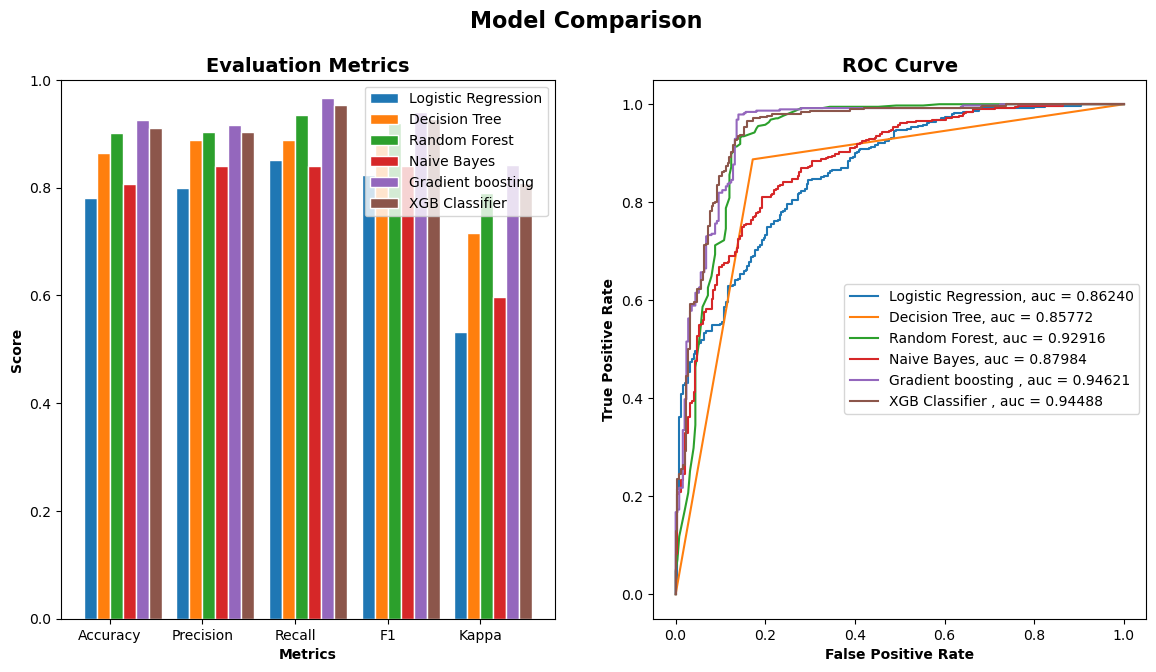

In [149]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.14
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
gb_score = [gb_eval['acc'], gb_eval['prec'], gb_eval['rec'], gb_eval['f1'], gb_eval['kappa']]
xgb_score = [xgb_eval['acc'], xgb_eval['prec'], xgb_eval['rec'], xgb_eval['f1'], xgb_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(lr_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

## Make the plot
ax1.bar(r1, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r2, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r5, gb_score, width=barWidth, edgecolor='white', label='Gradient boosting')
ax1.bar(r6,xgb_score,width=barWidth, edgecolor="white",label="XGB Classifier")

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(lr_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(gb_eval['fpr'], gb_eval['tpr'], label='Gradient boosting , auc = {:0.5f}'.format(gb_eval['auc']))
ax2.plot(xgb_eval['fpr'], xgb_eval['tpr'], label='XGB Classifier , auc = {:0.5f}'.format(xgb_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=5)

plt.show()

In [150]:
## Tabular Form

In [151]:
model=['logistic', 'Decision Tree','Random Forest','Naive Bayes','Gradient boosting','XGB']

In [154]:
scorecard = pd.DataFrame(index=model)
scorecard['cv']=[np.mean(scores),np.mean(scores_dt),np.mean(scores_rf),np.mean(scores_nb),np.mean(scores_gb),np.mean(scores_xgb)]
scorecard['train acc']=[accuracy_score(ytrain,lr.predict(xtrain)),accuracy_score(ytrain, dtc.predict(xtrain)),accuracy_score(ytrain, rf.predict(xtrain)),accuracy_score(ytrain, nb.predict(xtrain)),accuracy_score(ytrain, gb.predict(xtrain)),accuracy_score(ytrain,xgbc.predict(xtrain))]
scorecard['test acc']=[lr_eval['acc'],dtc_eval['acc'],rf_eval['acc'],nb_eval['acc'],gb_eval['acc'],xgb_eval['acc']]
scorecard['Precsion']=[lr_eval['prec'],dtc_eval['prec'],rf_eval['prec'],nb_eval['prec'],gb_eval['prec'],xgb_eval['prec']]
scorecard['Recall']=[lr_eval['rec'],dtc_eval['rec'],rf_eval['rec'],nb_eval['rec'],gb_eval['rec'],xgb_eval['rec']]
scorecard['F1']=[lr_eval['f1'],dtc_eval['f1'],rf_eval['f1'],nb_eval['f1'],gb_eval['f1'],xgb_eval['f1']]
scorecard['kappa']=[lr_eval['kappa'],dtc_eval['kappa'],rf_eval['kappa'],nb_eval['kappa'],gb_eval['kappa'],xgb_eval['kappa']]
scorecard['AUC']=[lr_eval['auc'],dtc_eval['auc'],rf_eval['auc'],nb_eval['auc'],gb_eval['auc'],xgb_eval['auc']]

In [155]:
scorecard

,cv,train acc,test acc,Precsion,Recall,F1,kappa,AUC
logistic,0.826814,0.788187,0.780063,0.798526,0.850785,0.823828,0.531977,0.862398
Decision Tree,0.890820,1.000000,0.863924,0.887435,0.887435,0.887435,0.715435,0.857717
Random Forest,0.936762,1.000000,0.900316,0.903797,0.934555,0.918919,0.789649,0.929157
Naive Bayes,0.823105,0.807196,0.806962,0.840314,0.840314,0.840314,0.596314,0.879843
Gradient boosting,0.942270,0.969450,0.925633,0.915633,0.965969,0.940127,0.842191,0.946215
XGB,0.935979,1.000000,0.909810,0.903226,0.952880,0.927389,0.808615,0.944880


The table you've provided shows the performance metrics of various machine learning algorithms. Here's an interpretation of each algorithm's performance based on the metrics:

1. **Logistic Regression**:
   - **Training Accuracy**: 78.82%
   - **Test Accuracy**: 78.01%
   - **Precision**: 79.85%
   - **Recall**: 85.08%
   - **F1 Score**: 82.38%
   - **Kappa**: 0.531977
   - **AUC**: 0.862398

   *Interpretation*: Logistic regression has a balanced performance, but its Kappa score is relatively lower, indicating moderate agreement. The AUC is good, suggesting decent classification performance.

2. **Decision Tree**:
   - **Training Accuracy**: 100%
   - **Test Accuracy**: 86.39%
   - **Precision**: 88.74%
   - **Recall**: 88.74%
   - **F1 Score**: 88.74%
   - **Kappa**: 0.715435
   - **AUC**: 0.857717

   *Interpretation*: The decision tree shows overfitting (100% training accuracy), but it generalizes better than logistic regression on the test set. The F1 score is also good, with a decent AUC.

3. **Random Forest**:
   - **Training Accuracy**: 100%
   - **Test Accuracy**: 90.03%
   - **Precision**: 90.38%
   - **Recall**: 93.46%
   - **F1 Score**: 91.89%
   - **Kappa**: 0.789649
   - **AUC**: 0.929157

   *Interpretation*: Random forest also overfits, but it has the highest test accuracy so far. It balances precision and recall well, and the AUC is excellent, indicating strong overall performance.

4. **Naive Bayes**:
   - **Training Accuracy**: 80.72%
   - **Test Accuracy**: 80.70%
   - **Precision**: 84.03%
   - **Recall**: 84.03%
   - **F1 Score**: 84.03%
   - **Kappa**: 0.596634
   - **AUC**: 0.879843

   *Interpretation*: Naive Bayes has consistent training and test accuracies with moderate precision, recall, and F1 scores. The Kappa score is lower, indicating less agreement between observed and predicted classifications. The AUC is also reasonable.

5. **Gradient Boosting**:
   - **Training Accuracy**: 96.95%
   - **Test Accuracy**: 92.57%
   - **Precision**: 91.56%
   - **Recall**: 96.60%
   - **F1 Score**: 94.01%
   - **Kappa**: 0.842191
   - **AUC**: 0.946215

   *Interpretation*: Gradient boosting offers strong performance, with high precision, recall, and F1 scores. It has the highest Kappa score so far, indicating strong agreement. The AUC is excellent, suggesting that it is a robust classifier.

6. **XGBoost**:
   - **Training Accuracy**: 100%
   - **Test Accuracy**: 90.98%
   - **Precision**: 90.32%
   - **Recall**: 95.29%
   - **F1 Score**: 92.74%
   - **Kappa**: 0.808615
   - **AUC**: 0.944880

   *Interpretation*: XGBoost shows strong performance, similar to gradient boosting, with a high F1 score and an excellent AUC. However, like other tree-based models, it overfits on the training data.

### Overall Recommendation:
- **Gradient Boosting** appears to be the best performer based on the combination of high accuracy, balanced precision and recall, high Kappa, and an excellent AUC score. However, **XGBoost** is also a very competitive choice with slightly lower performance but still strong overall metrics.
- If interpretability is crucial, **Logistic Regression** could be considered, though it may not perform as well as the more complex models.
